# Linear Regression using PyTorch

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

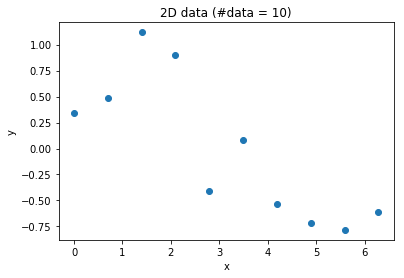

In [80]:
N = 10 # number of data points
x = np.linspace(0,2*np.pi,N)
y = np.sin(x) + np.random.normal(0,.3,x.shape)
plt.figure()
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

In [81]:
import torch

## Dataset

In [82]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        sample = {
            'feature': torch.tensor([1,self.x[idx]]), 
            'label': torch.tensor([self.y[idx]])}
        return sample

In [13]:
dataset = MyDataset(x, y)
for i in range(len(dataset)):
    sample = dataset[i]
    print(i, sample['feature'], sample['label'])

0 tensor([1., 0.]) tensor([0.0717])
1 tensor([1.0000, 0.6981]) tensor([0.2358])
2 tensor([1.0000, 1.3963]) tensor([1.3582])
3 tensor([1.0000, 2.0944]) tensor([1.2558])
4 tensor([1.0000, 2.7925]) tensor([0.6923])
5 tensor([1.0000, 3.4907]) tensor([-0.5425])
6 tensor([1.0000, 4.1888]) tensor([-0.2859])
7 tensor([1.0000, 4.8869]) tensor([-1.5182])
8 tensor([1.0000, 5.5851]) tensor([-0.7034])
9 tensor([1.0000, 6.2832]) tensor([0.6770])


## Dataloader

In [14]:
from torch.utils.data import DataLoader

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

In [19]:
import pprint as pp
for i_batch, samples in enumerate(dataloader):
    print('\nbatch# = %s' % i_batch)
    print('samples: ')
    pp.pprint(samples)


batch# = 0
samples: 
{'feature': tensor([[1.0000, 4.8869],
        [1.0000, 6.2832],
        [1.0000, 5.5851],
        [1.0000, 0.0000]]),
 'label': tensor([[-1.5182],
        [ 0.6770],
        [-0.7034],
        [ 0.0717]])}

batch# = 1
samples: 
{'feature': tensor([[1.0000, 0.6981],
        [1.0000, 1.3963],
        [1.0000, 4.1888],
        [1.0000, 3.4907]]),
 'label': tensor([[ 0.2358],
        [ 1.3582],
        [-0.2859],
        [-0.5425]])}

batch# = 2
samples: 
{'feature': tensor([[1.0000, 2.0944],
        [1.0000, 2.7925]]),
 'label': tensor([[1.2558],
        [0.6923]])}


## Model

In [24]:
import torch.nn as nn
import torch.nn.functional as F
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

### Setting a model for our problem

In [26]:
input_dim = 2
output_dim = 1

model = MyModel(input_dim, output_dim)

## Cost function

Often called loss or error

In [39]:
cost = nn.MSELoss()

## Minimizing the cost function

In other words training (or learning from data)

In [51]:
num_epochs = 10  # How many times the entire training data is seen?
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) 

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
training_sample_generator = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

for epoch in range(num_epochs):
    print('Epoch = %s' % epoch)
    for batch_i, samples in enumerate(training_sample_generator):
        predictions = model(samples['feature'])
        error = cost(predictions, samples['label'])
        print('\tBatch = %s, Error = %s' % (batch_i, error.item()))
        
        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the variables it will update (which are the learnable
        # weights of the model). This is because by default, gradients are
        # accumulated in buffers( i.e, not overwritten) whenever .backward()
        # is called. Checkout docs of torch.autograd.backward for more details.
        optimiser.zero_grad()
        
        # Backward pass: compute gradient of the loss with respect to model
        # parameters
        error.backward()
        
        # Calling the step function on an Optimizer makes an update to its
        # parameters
        optimiser.step()

Epoch = 0
	Batch = 0, Error = 0.518193244934082
	Batch = 1, Error = 0.4353530704975128
	Batch = 2, Error = 1.3510209321975708
Epoch = 1
	Batch = 0, Error = 0.563149631023407
	Batch = 1, Error = 0.5132748484611511
	Batch = 2, Error = 1.1007386445999146
Epoch = 2
	Batch = 0, Error = 0.4281182289123535
	Batch = 1, Error = 0.6110122799873352
	Batch = 2, Error = 1.3985527753829956
Epoch = 3
	Batch = 0, Error = 0.5820314288139343
	Batch = 1, Error = 0.8040990829467773
	Batch = 2, Error = 0.4797106087207794
Epoch = 4
	Batch = 0, Error = 0.45292630791664124
	Batch = 1, Error = 0.8768678307533264
	Batch = 2, Error = 0.629550039768219
Epoch = 5
	Batch = 0, Error = 0.8033242225646973
	Batch = 1, Error = 0.7512571811676025
	Batch = 2, Error = 0.3279489278793335
Epoch = 6
	Batch = 0, Error = 0.44895708560943604
	Batch = 1, Error = 0.5521496534347534
	Batch = 2, Error = 1.559319257736206
Epoch = 7
	Batch = 0, Error = 1.1045701503753662
	Batch = 1, Error = 0.19252537190914154
	Batch = 2, Error = 0.74

## Lets see how well the model has learnt the data

In [77]:
#from torch.autograd.variable import Variable

x_for_plotting = np.linspace(0, 2*np.pi, 1000)
design_matrix = torch.tensor(np.vstack([np.ones(x_for_plotting.shape), x_for_plotting]).T, dtype=torch.float32)
#print('Design matrix:\n', design_matrix)
print('Design matrix shape:', design_matrix.shape)

y_for_plotting = model.forward(design_matrix)
print('y_for_plotting shape:', y_for_plotting.shape)

Design matrix shape: torch.Size([1000, 2])
y_for_plotting shape: torch.Size([1000, 1])


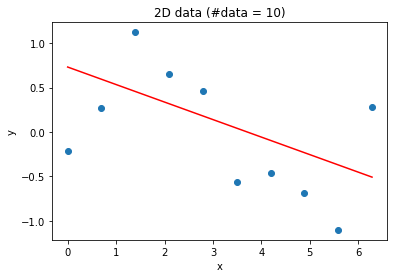

In [78]:
plt.figure()
plt.plot(x,y,'o')
plt.plot(x_for_plotting, y_for_plotting.data.numpy(), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()